# Introduction to Convolutional Neural Networks and Computer Vision

In [1]:
# Uncomment this to install scipy when running inside cuda containers
# !pip install scipy

## Get the data

In [2]:
import zipfile
import urllib.request
from os.path import exists

if (not exists("./datasets/pizza_steak.zip")):
    print("Downloading archive...")
    urllib.request.urlretrieve("https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip", "./datasets/pizza_steak.zip")
else:
    print("Archive already downloaded, unzipping...")

zip_ref = zipfile.ZipFile("datasets/pizza_steak.zip")
zip_ref.extractall("./datasets")
zip_ref.close()

Archive already downloaded, unzipping...


PermissionError: [Errno 13] Permission denied: 'datasets/__MACOSX/._pizza_steak'

## Inspect the data

It's crucial to understand the data before building any model on it

In [3]:
!ls datasets/pizza_steak/

test  train


In [4]:
!ls datasets/pizza_steak/train

pizza  steak


In [5]:
!ls datasets/pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os
for dirpath, dirnames, filenames in os.walk("datasets/pizza_steak"):
    print(f"There are {len(dirnames)} directories on {len(filenames)} files in {dirpath}")

There are 2 directories on 1 files in datasets/pizza_steak
There are 2 directories on 1 files in datasets/pizza_steak/test
There are 0 directories on 250 files in datasets/pizza_steak/test/pizza
There are 0 directories on 250 files in datasets/pizza_steak/test/steak
There are 2 directories on 1 files in datasets/pizza_steak/train
There are 0 directories on 750 files in datasets/pizza_steak/train/pizza
There are 0 directories on 750 files in datasets/pizza_steak/train/steak


In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("datasets/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("[!.DS_Store]*")])) # Create a list of classnames from the subdirectories

print(class_names)

['pizza' 'steak']


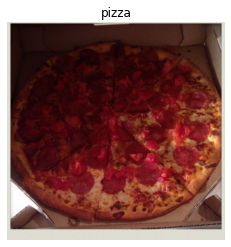

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + "/" + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    return img

img = view_random_image("datasets/pizza_steak/train", "pizza")

In [9]:
img.shape

(512, 512, 3)

## An end to end example

2021-11-08 14:36:18.162893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 14:36:18.162907: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


2021-11-08 14:36:19.175520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 14:36:19.175785: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 14:36:19.175824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-08 14:36:19.175859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-08 14:36:19.175893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/5
47/47 [==============================] - 26s 552ms/step - loss: 0.6236 - accuracy: 0.6320 - val_loss: 0.4786 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 25s 539ms/step - loss: 0.4794 - accuracy: 0.7807 - val_loss: 0.4490 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 26s 560ms/step - loss: 0.4462 - accuracy: 0.8120 - val_loss: 0.4114 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 27s 580ms/step - loss: 0.4176 - accuracy: 0.8140 - val_loss: 0.3706 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 28s 589ms/step - loss: 0.3972 - accuracy: 0.8333 - val_loss: 0.3747 - val_accuracy: 0.8400


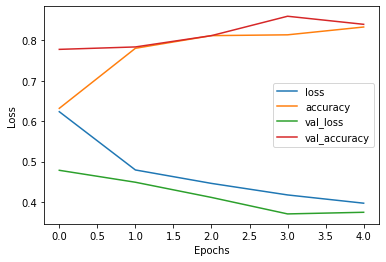

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from plot import plot_loss_curve

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "datasets/pizza_steak/train"
test_dir = "datasets/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    shuffle=True,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    shuffle=True,
    target_size=(224,224),
    class_mode="binary",
    seed=42
)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

plot_loss_curve(history)